# This notebook is about the EDA of our given Task 

Therefore we will have a close look into the target column and their values. The Data in trains as well as test is huge, therefore we have to do it with subsamples of the data. At the beginning we will look at the general distribution of the Null and Na values. After that we will take a closer look at our target column. How the different transactions are distributed and lastely we will have a look at our features 

In [6]:
# imports
# I was trying a lot of different things during this notebook therefore there might be the one or two libaries which
# arn´t needed anymore


import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 

import datetime as dt
from datetime import date
from scipy import stats
#from pandas.core import datetools
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
import warnings
import seaborn as sns


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn import preprocessing


import json
from time import sleep
from datetime import datetime

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix # confusion matrix
from sklearn import metrics

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import gc

In [7]:
from pylab import rcParams

rcParams['figure.figsize'] = 30, 30
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

%matplotlib inline

warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [8]:
#1  conda install -c anaconda lightgbm
#   conda install -c conda-forge r-catboost

# pip install lightgbm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import lightgbm as lgb
import xgboost as xgb
#from catboost import CatBoostRegressor

from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings('ignore')

In [9]:
# importing the Jason Data
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize



# Working with the first Dataset

In [10]:
# emplanaition: https://www.kaggle.com/kabure/exploring-the-consumer-patterns-ml-pipeline

csv_path='/Users/marcgehring/Desktop/Massey IT/158333/notebooks/ga-customer-revenue-prediction/train_v2.csv'
nrows=400000
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
df = pd.read_csv(csv_path, converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")

#print(os.listdir("../input"))
data_train = df  # this is our working file. So we can perform on data_train

Loaded train_v2.csv. Shape: (400000, 60)


# Analyzing our Data 

In [16]:
# looking for empty values
missing= data_train.isna().sum()
percent = (data_train.isnull().sum()/data_train.isnull().count()*100).sort_values(ascending=False).round(2)
missing_data =pd.DataFrame([missing, percent], index = ['missing', 'percent'])
missing_percent=missing_data.transpose()
missing_percent.sort_values(by='percent', ascending=False)

,missing,percent
trafficSource.campaignCode,399999.0,100.00
totals.transactionRevenue,395708.0,98.93
totals.totalTransactionRevenue,395708.0,98.93
totals.transactions,395692.0,98.92
trafficSource.adContent,386180.0,96.54
trafficSource.adwordsClickInfo.adNetworkType,382847.0,95.71
trafficSource.adwordsClickInfo.isVideoAd,382847.0,95.71
trafficSource.adwordsClickInfo.page,382847.0,95.71
trafficSource.adwordsClickInfo.slot,382847.0,95.71
trafficSource.adwordsClickInfo.gclId,382787.0,95.70


In [19]:
missing_c = missing.count()
total = 400000*60
anteil = (missing_c/total)*100
print('this is the percentage amount of all values that are missing', anteil,'%')

this is the percentage amount of all values that are missing 0.00025 %


# Analysis of the Transaction Column

In [11]:
print('Total Lenght', len(data_train['totals.transactionRevenue']))
print('NA values', data_train['totals.transactionRevenue'].isna().sum())
print('Mean', data_train['totals.transactionRevenue'].describe())

Total Lenght 400000
NA values 395708
Mean count         4292
unique        2435
top       33590000
freq           101
Name: totals.transactionRevenue, dtype: object


# Feauture Engineering
the Date will help us with all kinds of operations we´re doing on the data, therefore it should be intersting how we can extract the data. Creating new Feautures like the single day can help us grouping our data. Thats the problem with having many differnet data at different Datapoints. For the prediction time isn´t really the matter, but it is intersting for the eda to actually see how the different days, weeks and month are different

In [20]:
# 1.creating a datetime column for our Dates, after that we can extract the dates and create new columns.
data_train["date"] = pd.to_datetime(data_train["date"], format="%Y%m%d") # seting the column as pandas datetime

In [21]:
data_train['_hour'] = (data_train['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
data_train["_actualday"] = data_train['date'].dt.day # extracting day
data_train["_working_day"] = data_train['date'].dt.weekday #extracting week day
data_train["_month"] = data_train['date'].dt.month # extracting day
data_train["_year"] = data_train['date'].dt.year # extracting day

In [22]:
#creating a new Dataframe where the Date is the index and we can perform different visualiations
data_train_time = data_train.set_index('date')
data_train_time.head()

,channelGrouping,customDimensions,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode,_hour,_actualday,_working_day,_month,_year
date,,,,,,,,,,,,,,,,,,,,,
2017-10-16,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,13,16,0,10,2017
2017-10-16,Referral,"[{'index': '4', 'value': 'North America'}]",8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,6,16,0,10,2017
2017-10-16,Direct,"[{'index': '4', 'value': 'North America'}]",7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,13,16,0,10,2017
2017-10-16,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,5,16,0,10,2017
2017-10-16,Organic Search,"[{'index': '4', 'value': 'Central America'}]",6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,10,16,0,10,2017


In [23]:
# This is the amount of the totals.transactionRevenue per BM: business month end frequency
amount= data_train_time['totals.transactionRevenue'].resample('BM').count()
amount

date
2016-08-31    375
2016-09-30    208
2016-10-31    193
2016-11-30    480
2016-12-30    315
2017-01-31    179
2017-02-28    155
2017-03-31    239
2017-04-28    221
2017-05-31    309
2017-06-30    371
2017-07-31     89
2017-08-31    175
2017-09-29    165
2017-10-31    186
2017-11-30    142
2017-12-29     34
2018-01-31    157
2018-02-28     97
2018-03-30    101
2018-04-30    101
Freq: BM, Name: totals.transactionRevenue, dtype: int64

In [24]:
# creating a new Feauture where we have the value of the transaction in it
data_train_time_wt = data_train_time
data_train_time_wt['transaction'] = data_train_time['totals.transactionRevenue']

# We have to convert it to work with it
data_train_time_wt['transaction'] = pd.to_numeric(data_train_time_wt['transaction'])
data_train_time_wt

,channelGrouping,customDimensions,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode,_hour,_actualday,_working_day,_month,_year,transaction
date,,,,,,,,,,,,,,,,,,,,,
2017-10-16,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,...,NaN,NaN,NaN,NaN,13,16,0,10,2017,NaN
2017-10-16,Referral,"[{'index': '4', 'value': 'North America'}]",8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,6,16,0,10,2017,NaN
2017-10-16,Direct,"[{'index': '4', 'value': 'North America'}]",7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,13,16,0,10,2017,NaN
2017-10-16,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,5,16,0,10,2017,NaN
2017-10-16,Organic Search,"[{'index': '4', 'value': 'Central America'}]",6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,10,16,0,10,2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-25,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",3864048393720244381,"[{'hitNumber': '1', 'time': '0', 'hour': '15',...",Not Socially Engaged,1511651260,1,1511651260,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,12,25,5,11,2017,NaN
2017-11-25,Direct,"[{'index': '4', 'value': 'APAC'}]",0133802220595164530,"[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",Not Socially Engaged,1511597517,1,1511597517,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,21,25,5,11,2017,NaN
2017-11-25,Display,"[{'index': '4', 'value': 'North America'}]",8839221334461540297,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1511659285,107,1511659285,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,14,25,5,11,2017,NaN


In [244]:

#these are the amount of transaction with a Nan Value 
dat = data_train_time['totals.transactionRevenue'].isna().resample('BM').count()
dat_plt = dat.values.tolist()

#prepairing the actual amout of transaction we have 
dat_amount= data_train_time['totals.transactionRevenue'].resample('BM').count()
dat_amount_plt = dat_amount.values.tolist()


dat_values = data_train_time.transaction.resample('BM').sum()

# Take off the date index
datp = dat.reset_index()

# Plotly
trace0 = go.Scatter(
    x = datp['date'],
    y = dat,
    name = 'NA_values',
    line = dict(
        color = ('#ff6347'),
        width = 4)
    
)
trace1 = go.Scatter(
    x = datp['date'],
    y = dat_amount,
    name = 'Actual transactions',
    line = dict(
        color = ('#92a1cf'),
        width = 6,
    dash="dot")
)

data = [trace0,trace1]


# Edit the layout
layout = dict(title = 'Amout of Transaction with Na_values over time',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'NA_amounts'),
              
              paper_bgcolor='#FFF9F5',
              plot_bgcolor='#FFF9F5'
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

# Result of the Transaction Analysis over time
Out of the first graph, we can take the information with the red line wich shoes the amount of Na_values within the transactions and the blue dottet line shows the actual amount of transaction. Interesting to see is that the amount of transaction are so small compared to the amount of Na_values. Further notice is that it actually looks like the visits within the store are kind of seasonal. We interpret the Na values at the end of the project as visits in the store but not purchases. Because the amount of transaction doesn´t really increase within the time the na_values are low, lead to the consumpotion that there were less customers. Therefore a little trend is to see when it comes to the visits within the store. It would be interesting to see if Prophet could be a good prediction model for this case

In [29]:
#Taking a closer look of the actuel transaction, how they arte distributed and what values we get



#these are the amount of transaction with a Nan Value 
dat = data_train_time['totals.transactionRevenue'].isna().resample('BM').count()


dat_values = data_train_time.transaction.resample('BM').sum()

# Take off the date index
datp = dat.reset_index()




values= data_train_time.transaction.resample('W').sum()
values


# Take off the date index
datp = dat.reset_index()

# Plotly
trace0 = go.Scatter(
    x = datp['date'],
    y = values,
    name = 'Transaction_sum',
    line = dict(
        color = ('#ff6347'),
        width = 4)
    
)

data = [trace0]


# Edit the layout
layout = dict(title = 'Sum of the Transactions over time',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'NA_amounts'),
              
              paper_bgcolor='#FFF9F5',
              plot_bgcolor='#FFF9F5'
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

# Result of the Transaction Analysis over time
It´s a nice graph to see hoe spread up the transactions are. But it also look like the total transaction value increased a lot within the year 2018 and actually had it´s overall high in Feb 2018. One possible but not really realistic explanation for that is the Android and Google service mitigations.
https://source.android.com/security/bulletin/2018-02-01

# Further analysis of the Transactions


In [39]:
data_train.rename(columns={'totals.transactionRevenue' : 'total_transactionRevenue'},inplace=True)

In [42]:
train = data_train[['total_transactionRevenue']]

In [51]:
train.fillna(0, inplace =True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 1 columns):
total_transactionRevenue    400000 non-null object
dtypes: object(1)
memory usage: 3.1+ MB


In [52]:
for f in train.columns:
    #if f != 'total_transactionRevenue':
        if train[f].dtype=='object': 
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train[f].values))
            train[f] = lbl.transform(list(train[f].values))

# Analysis of the Distribution
Count Plots and Histograms need int´s, that´s why we were using the encoder before

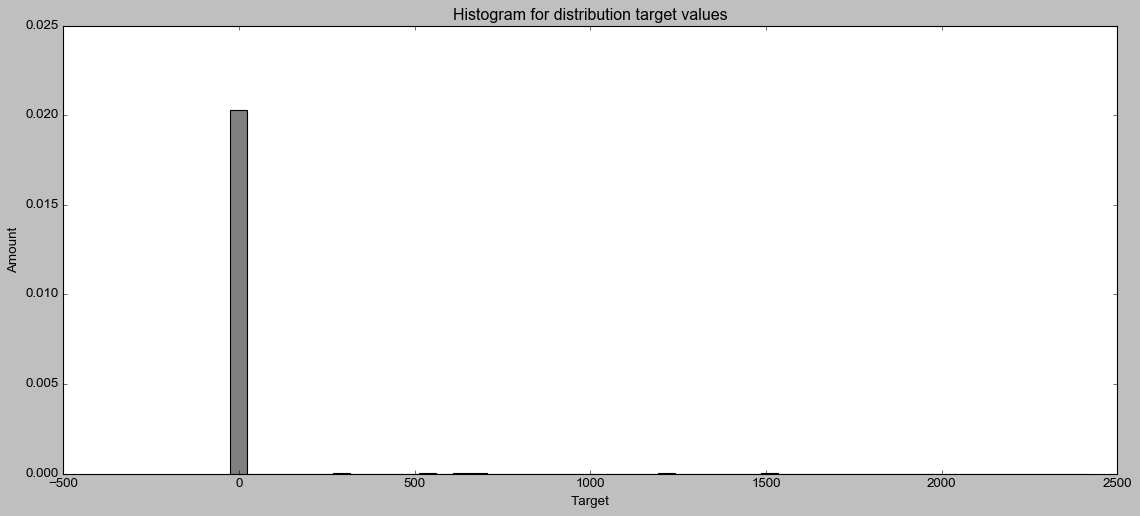

In [53]:
#all palettes: https://matplotlib.org/tutorials/introductory/customizing.html
with plt.style.context('classic'):
    plt.figure(figsize=(17, 7))
    plt.hist(train.total_transactionRevenue.values, bins=50, density = True, 
         histtype = 'barstacked', align = 'left', orientation = 'vertical',
        log = False, color = 'grey')
    plt.title('Histogram for distribution target values')
    plt.xlabel('Target')
    plt.ylabel('Amount')
plt.show()

In [55]:
x = train[train.total_transactionRevenue > 0]
x

,total_transactionRevenue
433,447
550,2196
555,1820
597,621
619,247
...,...
399552,979
399555,1669
399556,2181
399563,1578


# Distribution without null values

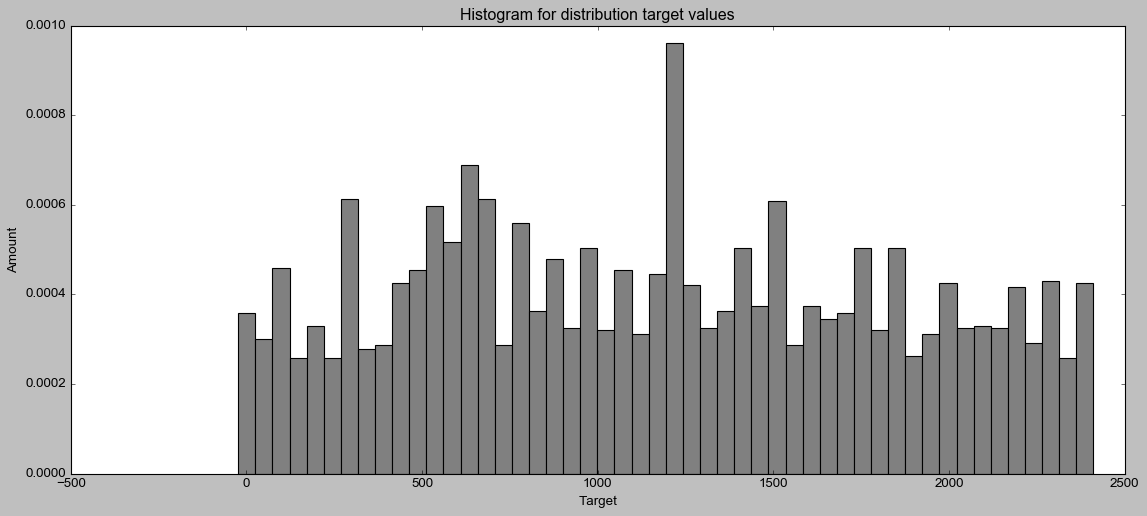

In [58]:
train = x
#all palettes: https://matplotlib.org/tutorials/introductory/customizing.html
with plt.style.context('classic'):
    plt.figure(figsize=(17, 7))
    plt.hist(train.total_transactionRevenue.values, bins=50, density = True, 
         histtype = 'barstacked', align = 'left', orientation = 'vertical',
        log = False, color = 'grey')
    plt.title('Histogram for distribution target values')
    plt.xlabel('Target')
    plt.ylabel('Amount')
plt.show()

# Specification of the Target cumulative

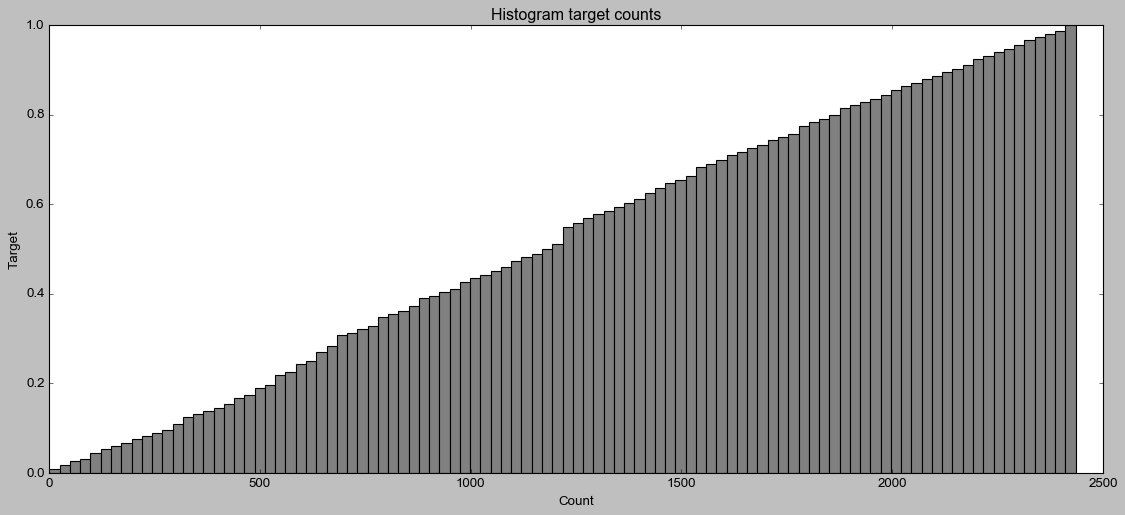

In [57]:
with plt.style.context('classic'):
    plt.figure(figsize=(17, 7))
    plt.hist(train.total_transactionRevenue.values, bins=100, density = True, cumulative = True, color = 'grey')
    plt.title('Histogram target counts')
    plt.xlabel('Target')
    plt.ylabel('Amount')
plt.show()

# Final Distribution

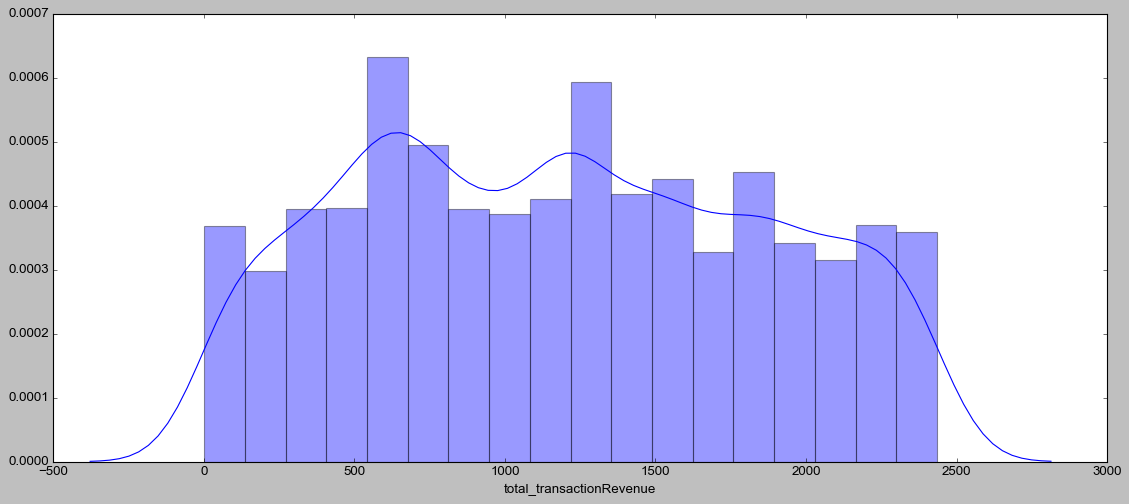

In [60]:
with plt.style.context('classic'):
    plt.figure(figsize=(17, 7))
    sns.distplot(train["total_transactionRevenue"])
plt.show()

# Result 
We can see a equaly balanced distribution of the target within the analysis of the "Distribution without null values". Furthermore we can see how nice good the values are actually distributed, because the cumulative curve is going very straigtht up. The last graph supports the graphs before with a equally balanced distribution of transaction values. We used the encoder to show the distribution better. We took the problem of having encoded numbers into consideration. Therefore we were using the graphs of the distribution over time before. 


# Analysis of the different features 

In [64]:
features_lgbm = pd.read_csv('/Users/marcgehring/Desktop/Massey IT/158333/notebooks/Google_Feature_importance.csv')
features_lgbm.set_index('feature', inplace=True)
features_lgbm

,Unnamed: 0,split,gain
feature,,,
totals.pageviews,31,2736,20.018919
totals.timeOnSite,34,4770,17.186123
totals.sessionQualityDim,33,3733,16.005823
totals.hits,30,3473,14.844270
channelGrouping,0,1403,7.564720
geoNetwork.city,23,1749,5.036257
geoNetwork.networkDomain,25,1575,4.990131
device.operatingSystem,5,1204,3.677374
geoNetwork.metro,22,1082,3.509325


In [65]:
features_lgbm.iloc[:10].index

Index(['totals.pageviews', 'totals.timeOnSite', 'totals.sessionQualityDim',
       'totals.hits', 'channelGrouping', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'device.operatingSystem',
       'geoNetwork.metro', 'geoNetwork.region'],
      dtype='object', name='feature')

In [68]:
train.columns

Index(['total_transactionRevenue'], dtype='object')

In [69]:
plt_df = data_train[['totals.pageviews', 'totals.timeOnSite', 'totals.sessionQualityDim',
       'totals.hits', 'channelGrouping', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'device.operatingSystem',
       'geoNetwork.metro', 'geoNetwork.region']]

In [72]:
train_RM = plt_df
for f in train_RM.columns:
    #if f != 'total_transactionRevenue':
        if train_RM[f].dtype=='object': 
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train_RM[f].values))
            train_RM[f] = lbl.transform(list(train_RM[f].values))

In [74]:
for f in train_RM.columns:
    #if f != 'total_transactionRevenue':
        if train_RM[f].dtype=='str': 
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train_RM[f].values))
            train_RM[f] = lbl.transform(list(train_RM[f].values))

In [76]:
plt_df = train_RM 

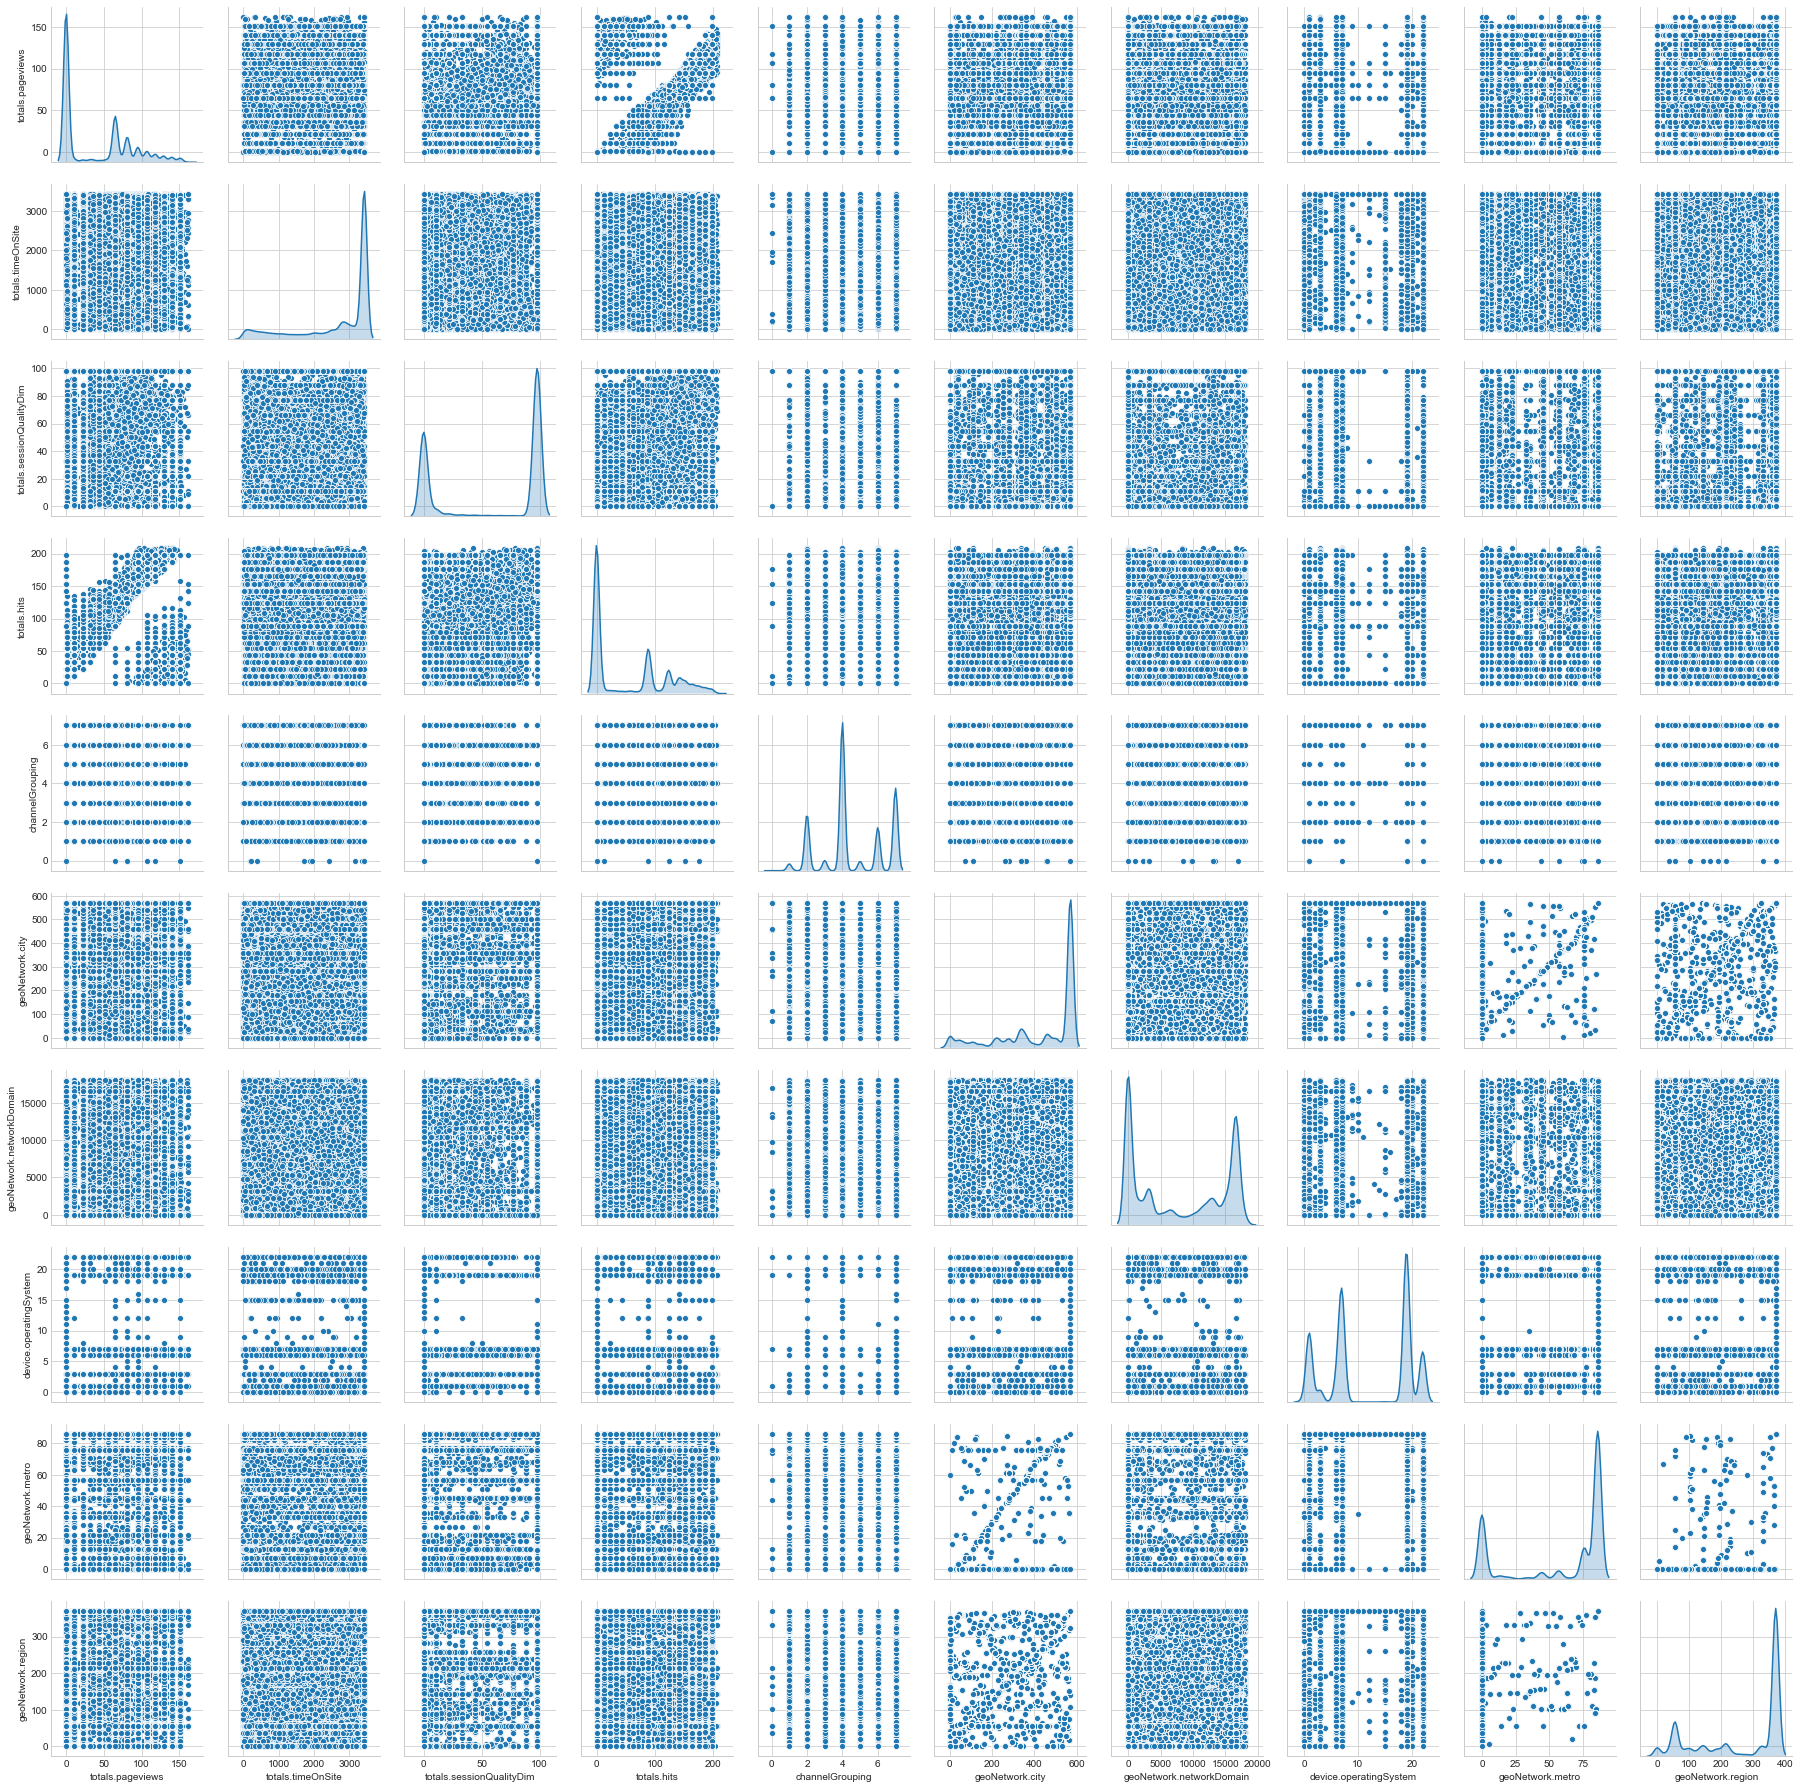

In [77]:
p = sns.pairplot(plt_df, diag_kind="kde", palette="winter")

# Result of the first visualiation
We can´t really see any pattern behind the data. Therefore we will take a additional look at the nummeric corrleation of the values. 

In [79]:
plt_df['target'] = data_train.total_transactionRevenue
plt_df

,totals.pageviews,totals.timeOnSite,totals.sessionQualityDim,totals.hits,channelGrouping,geoNetwork.city,geoNetwork.networkDomain,device.operatingSystem,geoNetwork.metro,geoNetwork.region,target
0,0,3421,0,0,4,571,0,19,86,370,NaN
1,65,1880,11,89,6,135,0,3,76,56,NaN
2,65,2437,0,89,2,571,17613,1,86,370,NaN
3,65,0,0,89,4,571,16562,19,86,370,NaN
4,65,2813,0,89,4,571,12340,19,86,370,NaN
...,...,...,...,...,...,...,...,...,...,...,...
399995,0,3421,0,0,4,571,15213,19,86,370,NaN
399996,0,3421,0,0,2,343,561,7,0,182,NaN
399997,0,3421,0,0,3,281,0,22,45,56,NaN
399998,0,3421,0,0,4,571,1161,22,86,370,NaN


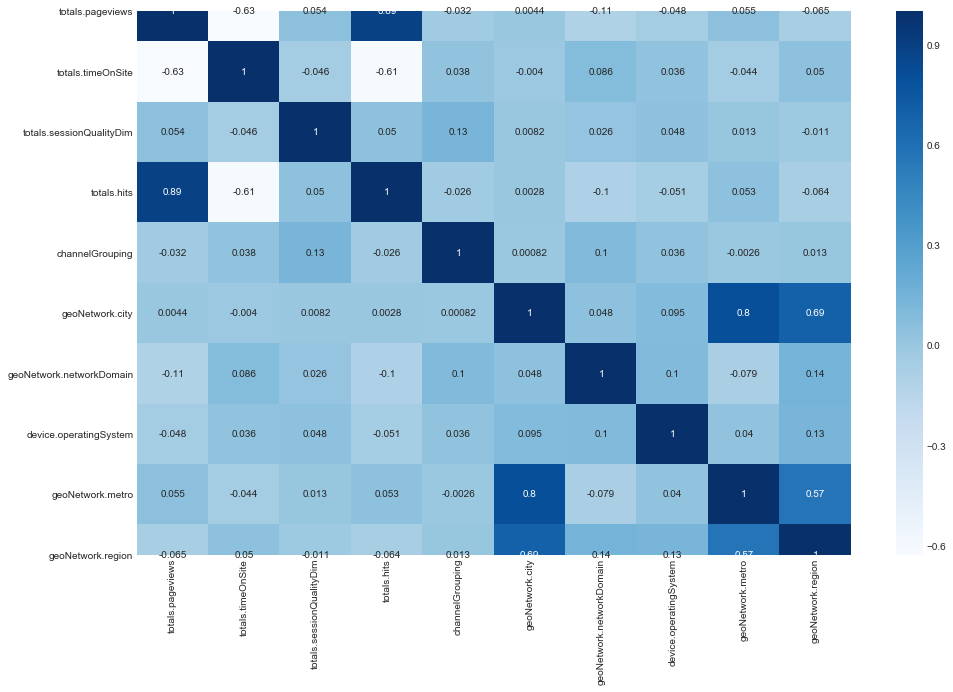

In [78]:
# other way of correlation, to see the actual numbers.
corr = plt_df.corr()
plt.figure(figsize = (16,10))
plt.xticks(fontsize=10,rotation=40)
plt.yticks(fontsize=10,rotation=60)
p =sns.heatmap(corr, annot=True, cmap="Blues")

# Analysis between the different Feautures

We can see the highes correlation values are between total.hits and totals.pageviews as well as geoNetwork.metro and geoNetwork.city and veoNetwork.region and geoNetwork.city. The overall corrleation scores are relatively small. 

# Result of the EDA
Overall we can see that there are many Nan values within our Dataset. Especially when it comes to the target values. It´s just a really small percentage of google visitors that actually pay for any kind of product. Due to the time we spend for this project we had to set a clear focus on the prediction of the target. Therefore the EDA also had a strict focus on the target value and the correlation value as well as the different features. 